# P2 - Baseball Data Exploration

For this exploration, I will load, clean, and visualize data from the Pitching and All Star Game tables of the baseball database. Any potentially interesting independent variables from the Pitching table about individual player statistics will be looked at along with information about if that player was chosen to play in an all star game (or multiple) for each year. 

### First necessary libraries must be imported

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
os.chdir(os.path.join('baseballdatabank-master','core'))

### Data analyzed will be from the Pitching statistics table

In [3]:
pitching_df = pd.read_csv('Pitching.csv')

In [4]:
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


### Additional Data from the All Star Appearances Table

In [5]:
allstar_df = pd.read_csv('AllstarFull.csv')
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


### Table Features description from the Readme file

2.3 Pitching table

* playerID:        Player ID code
* yearID:          Year
* stint:           player's stint (order of appearances within a season)
* teamID:          Team
* lgID:            League
* W:               Wins
* L:               Losses
* G:               Games
* GS:              Games Started
* CG:              Complete Games 
* SHO:             Shutouts
* SV:              Saves
* IPOuts:          Outs Pitched (innings pitched x 3)
* H:               Hits
* ER:              Earned Runs
* HR:              Homeruns
* BB:              Walks
* SO:              Strikeouts
* BAOpp:           Opponent's Batting Average
* ERA:             Earned Run Average
* IBB:             Intentional Walks
* WP:             Wild Pitches
* HBP:            Batters Hit By Pitch
* BK:             Balks
* BFP:            Batters faced by Pitcher
* GF:             Games Finished
* R:              Runs Allowed
* SH:             Sacrifices by opposing batters
* SF:             Sacrifice flies by opposing batters
* GIDP:           Grounded into double plays by opposing batter

2.5  AllstarFull table

* playerID:        Player ID code
* YearID:          Year
* gameNum:         Game number (zero if only one All-Star game played that season)
* gameID:          Retrosheet ID for the game idea
* teamID:          Team
* lgID:            League
* GP:              1 if Played in the game
* startingPos:     If player was game starter, the position played

## Definitions: 
Balk - from Wikipedia (https://en.wikipedia.org/wiki/Balk)
>"In baseball, a pitcher can commit a number of illegal motions or actions that constitute a balk. Most of these violations involve a pitcher pretending to pitch when he has no intention of doing so. In games played under the Official Baseball Rules, a balk results in a dead ball or delayed dead ball."

Wild Pitch - from Wikipedia (https://en.wikipedia.org/wiki/Wild_pitch)
>"In baseball, a wild pitch (abbreviated WP) is charged against a pitcher when his pitch is too high, too short, or too wide of home plate for the catcher to control with ordinary effort, thereby allowing a baserunner, perhaps even the batter-runner on an uncaught third strike, to advance."

# Questions

Based on the more limited set of variables, some questions that can be explored in this EDA include the following:

1) Which variables are most strongly correlated with number of All Star Games for a pitcher in a particular year?

2) Which variables are most strongly correlated with number of Wins for a pitcher in a particular year?

3) Are there any trends over the years about the number of runs allowed, hits, strikeouts, or any of the other pitching data (besides wins)? ie did either pitchers or batters seem to improve performance over the years?

# Data Wrangling
The purpose of data wrangling will be to remove any missing values, reduce the number of features analyzed, make sure all of the data is in a uniform and helpful format, and merging any additional data that will be analyzed. 

## Pitching Table

## Reducing the features Analyzed
Too many variables to analyze at once; just going to keep a few features, some of the more easily understood ones. 

* playerID:        Player ID code
* yearID:          Year
* teamID:          Team
* W:               Wins
* SHO:             Shutouts
* IPOuts:          Outs Pitched (innings pitched x 3)
* H:               Hits
* SO:              Strikeouts
* R:               Runs Allowed

In [6]:
pitch_df = pitching_df[ ['W','playerID','yearID','teamID','SHO','IPouts','H','SO','R','HR']]

### Missing Values
#### Percent of each column that is null (of those nonzero)

In [7]:
pct_null = pitch_df.isnull().sum() / len(pitch_df) * 100
pct_null[pct_null > 0]

IPouts    0.002266
dtype: float64

### IPouts

Very few of the rows have null values now, let's take a look and see what typical values are for IPouts and decide how to deal with null values in that column. 

In [8]:
pitch_df.IPouts.value_counts().iloc[:4]

3.0     668
6.0     640
12.0    477
9.0     439
Name: IPouts, dtype: int64

In [9]:
pitch_df.IPouts.value_counts().loc[0.0]

89

The number of seasons that a pitcher has had 0 IPouts is 89. Let's next look at the rows that have null values for IPouts. 

In [10]:
pitch_df[pitch_df.IPouts.isnull()]

,W,playerID,yearID,teamID,SHO,IPouts,H,SO,R,HR
42959,0,leblawa01,2014,LAA,0,NaN,6,4,4,2


Just one row is null for IPouts, so I will drop it and not worry about losing much data. 

In [11]:
pitch_df = pitch_df.dropna(subset=['IPouts'])

## Cleaning - All Star table

Finally, the All Star Game table must be reduced to the features needed for analysis and cleaned of any null values. 

### Reducing number of features analyzed
In order to aggregate data about the number of all star games a player is chosen for in a year, the only information we need is the playerID and the YearID, plus one more to aggregate on, so we will only keep those rows going forward.

* playerID:        Player ID code
* YearID:          Year
* gameNum:         Game number (zero if only one All-Star game played that season)

In [12]:
all_star_df = allstar_df[['playerID','yearID','gameNum']]

### Null Values

In [13]:
all_star_df.isnull().sum()

playerID    0
yearID      0
gameNum     0
dtype: int64

No null values to speak of in the reduced all-star table, so moving on to the data aggregation step

## Aggregating Data

In order to analyze the effect of pitching statistics on the number of all star games a player was chosen for in a particular year, I will need to aggregate the all star game data by playerID and yearID, add up the number of games played, and merge that into the pitching table based on shared playerID and yearID. 

In [14]:
AllStarCount_df = pd.DataFrame(all_star_df.groupby(['playerID','yearID']).gameNum.count())
AllStarCount_df = AllStarCount_df.reset_index()
AllStarCount_df.head()

,playerID,yearID,gameNum
0,aaronha01,1955,1
1,aaronha01,1956,1
2,aaronha01,1957,1
3,aaronha01,1958,1
4,aaronha01,1959,2


In [15]:
# renaming the gameNum column
AllStarCount_df = AllStarCount_df.rename(columns={'gameNum':'allStarGameCnt'})

In [16]:
pitch_agg_df = pitch_df.merge(AllStarCount_df,on=['playerID','yearID'],how='left')
pitch_agg_df.head()

,W,playerID,yearID,teamID,SHO,IPouts,H,SO,R,HR,allStarGameCnt
0,1,bechtge01,1871,PH1,0,78.0,43,1,42,0,NaN
1,12,brainas01,1871,WS3,0,792.0,361,13,292,4,NaN
2,0,fergubo01,1871,NY2,0,3.0,8,0,9,0,NaN
3,4,fishech01,1871,RC1,1,639.0,295,15,257,3,NaN
4,0,fleetfr01,1871,NY2,0,27.0,20,0,21,0,NaN


All that remains is to fill missing values in my new allStarGameCnt column. Any rows that do not have a value represent a player that was not chosen for any all star games in that year, so I will replace all NaN values with zero. 

In [17]:
pitch_agg_df.isnull().sum()

W                     0
playerID              0
yearID                0
teamID                0
SHO                   0
IPouts                0
H                     0
SO                    0
R                     0
HR                    0
allStarGameCnt    42512
dtype: int64

In [18]:
pitch_agg_df = pitch_agg_df.fillna(value=0)

In [19]:
pitch_agg_df.isnull().sum().sum()

0

No null values remain in our dataframe

# Data Exploration

In [20]:
pitch_agg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,44138.0,4.748901,5.838012,0.0,0.0,2.0,7.0,59.0
yearID,44138.0,1967.785446,37.352374,1871.0,1940.0,1977.0,2000.0,2015.0
SHO,44138.0,0.456160,1.118221,0.0,0.0,0.0,0.0,16.0
IPouts,44138.0,255.673886,258.428826,0.0,50.0,169.0,397.0,2040.0
H,44138.0,85.541619,84.947865,0.0,18.0,56.0,135.0,772.0
SO,44138.0,46.486746,49.324661,0.0,8.0,31.0,68.0,513.0
R,44138.0,43.333182,43.438041,0.0,11.0,29.0,68.0,519.0
HR,44138.0,6.427319,6.979440,0.0,1.0,4.0,9.0,50.0
allStarGameCnt,44138.0,0.038153,0.198309,0.0,0.0,0.0,0.0,2.0


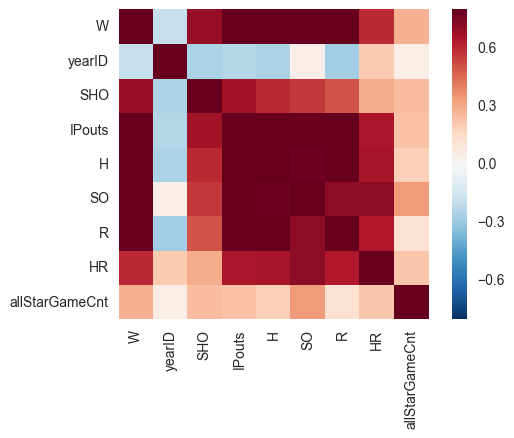

In [21]:
corrmat = pitch_agg_df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [22]:
pitch_agg_df.corr()

,W,yearID,SHO,IPouts,H,SO,R,HR,allStarGameCnt
W,1.000000,-0.187918,0.695122,0.934844,0.891603,0.823198,0.809596,0.594342,0.285268
yearID,-0.187918,1.000000,-0.252865,-0.231298,-0.251037,0.050570,-0.280106,0.206606,0.056590
SHO,0.695122,-0.252865,1.000000,0.673782,0.605572,0.566470,0.505211,0.294834,0.244886
IPouts,0.934844,-0.231298,0.673782,1.000000,0.979534,0.849105,0.925330,0.652381,0.236985
H,0.891603,-0.251037,0.605572,0.979534,1.000000,0.781412,0.966077,0.660833,0.188745
SO,0.823198,0.050570,0.566470,0.849105,0.781412,1.000000,0.715289,0.713932,0.337983
R,0.809596,-0.280106,0.505211,0.925330,0.966077,0.715289,1.000000,0.639798,0.131061
HR,0.594342,0.206606,0.294834,0.652381,0.660833,0.713932,0.639798,1.000000,0.222909
allStarGameCnt,0.285268,0.056590,0.244886,0.236985,0.188745,0.337983,0.131061,0.222909,1.000000


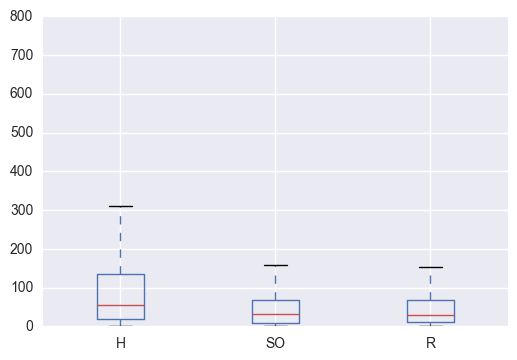

In [23]:
pitch_agg_df[['H','SO','R']].plot(kind = 'box')

# Question 1: Variables that Correlate with allStarGameCnt

### Highest correlation with allStarGameCnt
The variable that has the highest correlation with allStarGameCnt is SO (strikeouts) for pitchers. Additional variables with notable correlation with allStarGameCnt are W, SHO, IPouts, and HR (homeruns). The correlation between allStarGameCnt and HR being positive is a bit perplexing, as one would expect that a pitcher with fewer Homeruns against him would be more, not less, likely to be chosen for an all-star game. 

It is worth noting that the relationship between allStarGameCnt and the rest of the variables is much weaker than the correlation between W (number of wins) and a number of the other variables, including SHO, IPouts, H, SO, and R. 
The variable that has the highest correlation with W (the number of wins) is IPouts (outs pitched). Additionally, many of the variables are highly correlated not only with W but with each other. 

Below are some visualizations further exploring these correlations. 

### All Star Games vs Shutouts

allStarGameCnt
0.0    Axes(0.125,0.125;0.775x0.775)
1.0    Axes(0.125,0.125;0.775x0.775)
2.0    Axes(0.125,0.125;0.775x0.775)
Name: SO, dtype: object

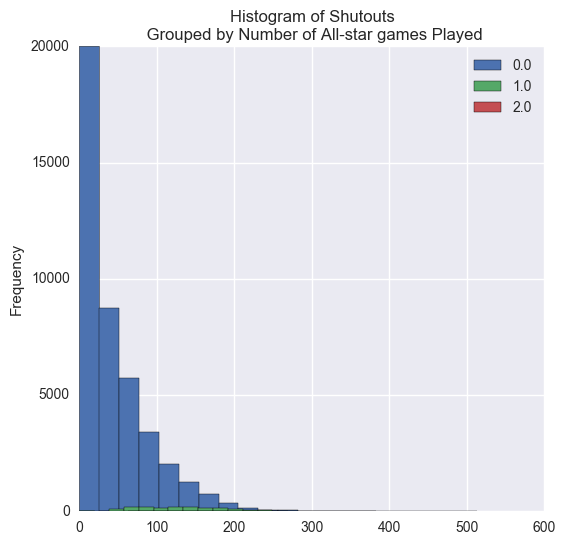

In [24]:
pitch_agg_df.groupby('allStarGameCnt').SO.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                                title='Histogram of Shutouts\n Grouped by Number of All-star games Played')

The number of pitchers chosen for all star games is miniscule compared to the total number, so I will try this histogram again with only those players chosen for one or two All Star Games included. 

allStarGameCnt
1.0    Axes(0.125,0.125;0.775x0.775)
2.0    Axes(0.125,0.125;0.775x0.775)
Name: SO, dtype: object

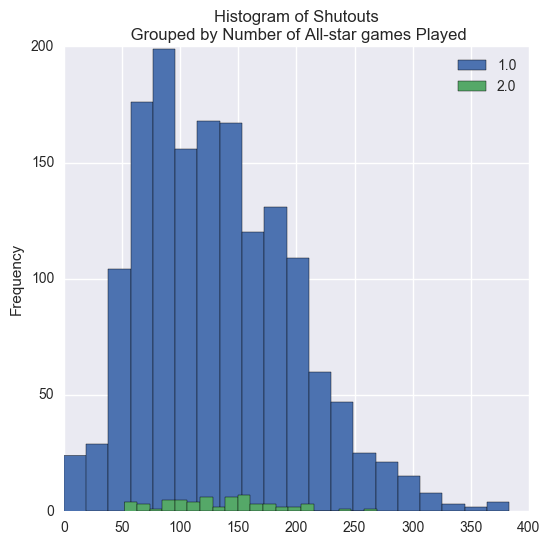

In [25]:
pitch_agg_df[pitch_agg_df.allStarGameCnt > 0].groupby('allStarGameCnt').SO.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                                title='Histogram of Shutouts\n Grouped by Number of All-star games Played')

The two visualizations clearly show that players who achieve a low number of shutouts are much less likely to be chosen for an All-Star game. On the upper end, however, it does not seem as though achieving a large number of shutouts is highly correlated with being chosen to play in an all-star game.

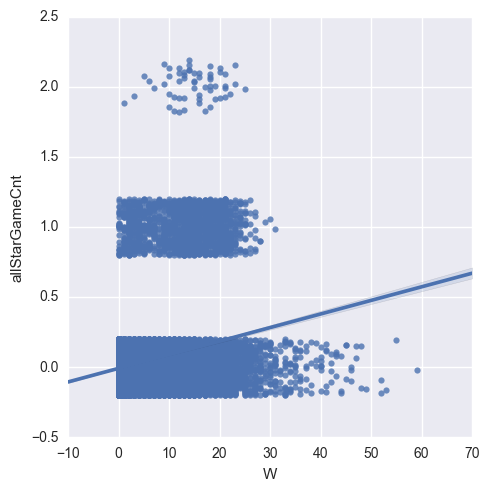

In [26]:
g = sns.lmplot(x='W',y='allStarGameCnt',y_jitter=.2,data=pitch_agg_df)
# All star games vs. Wins by Pitchers

As with Strikeouts, Wins do seem to have a modest positive correlation with being chosen for an All-Star game for pitchers. 

# Question 2: Variables Correlated with Wins

### Highest correlation with W
As previously mentioned, the relationship between W (number of wins) and a number of the other variables, including SHO, IPouts, H, SO, and R, is quite strong. The variable that has the highest correlation with W (the number of wins) is IPouts (outs pitched). However, many of the variables are highly correlated not only with W but with each other, which would make it inadvisable to include multiple of them in a predictive model. 

Below are some visualizations further exploring these correlations. 

### Wins vs Hits
This is an odd relationship, since one would expect fewer hits by opposing players to translate to more Wins, but it could be that it is an underlying correlation with Pitchers who play more often, so they have more hits by opposing players for that reason.

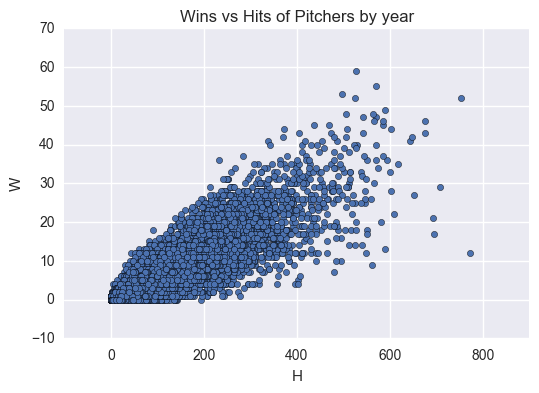

In [27]:
pitch_df.plot(kind='scatter',x='H',y='W',title='Wins vs Hits of Pitchers by year')

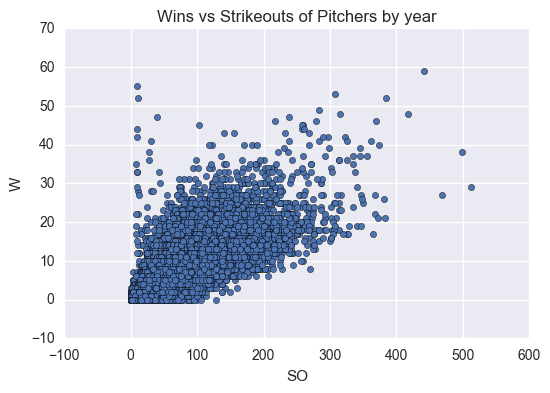

In [28]:
pitch_df.plot(kind='scatter',x='SO',y='W',title='Wins vs Strikeouts of Pitchers by year')

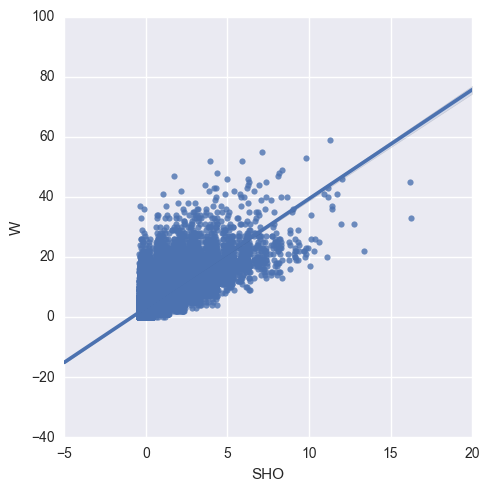

In [29]:
g = sns.lmplot(x='SHO',y='W',x_jitter=.4,data=pitch_agg_df)
#'Wins vs Shutouts of Pitchers by year'
# Jitter added to help visualization, since SHO would otherwise be a discrete variable

Clearly there is a positive correlation between W and SO, SHO, and H. 

## Question 3: Trends over Time

In order to explore trends, I will plot various statistics of pitchers against yearID and see if there seem to be any correlations, positive or negative. From the correlation table above, the most likely variables to have trends over time are HR, H, and SHO. 

#### Runs

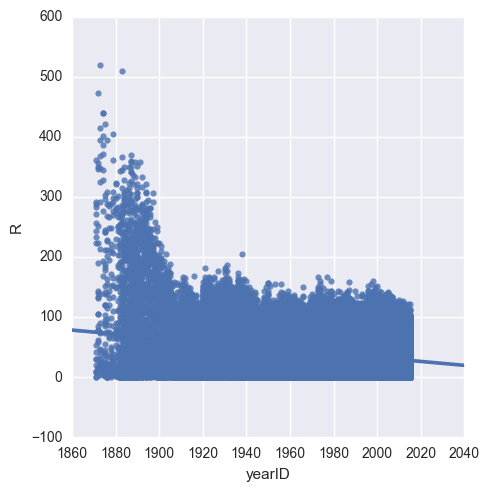

In [30]:
g = sns.lmplot(x='yearID',y='R',data=pitch_df)
# Runs vs year for Pitchers

Over time, pitchers seem to give up fewer and fewer runs. Since the data might have been skewed from the earliest data, I will try this visualization again with just data since 1930 to see if the trend seems to hold.

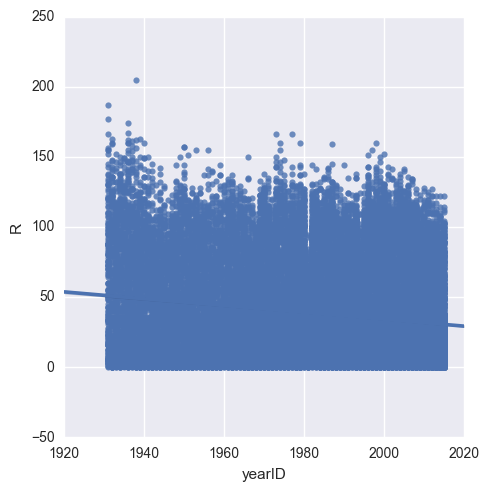

In [31]:
recent_pitch_data = pitch_df[pitch_df['yearID'] > 1930]
g = sns.lmplot(x='yearID',y='R',data=recent_pitch_data)

#### Homeruns

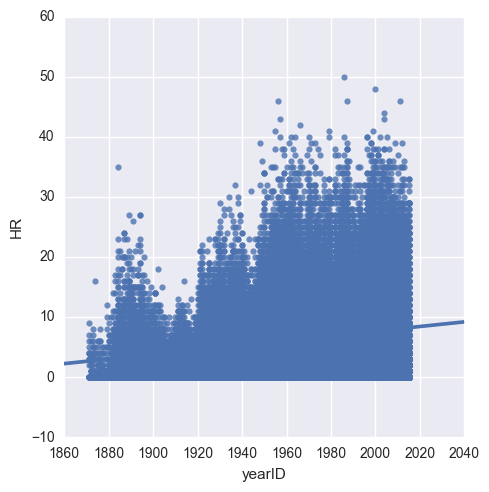

In [32]:
g = sns.lmplot(x='yearID',y='HR',data=pitch_agg_df)
# Home Runs vs year for Pitchers

On the other hand, number of homeruns that each pitcher threw seems to have modestly increased over time, perhaps due to batter skill increases. 

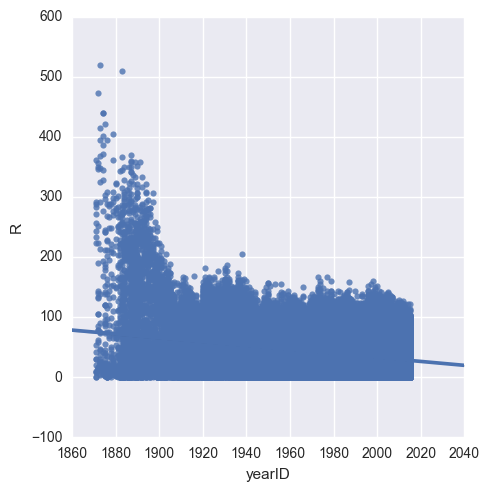

In [33]:
g = sns.lmplot(x='yearID',y='R',data=pitch_agg_df)

#### Shutouts

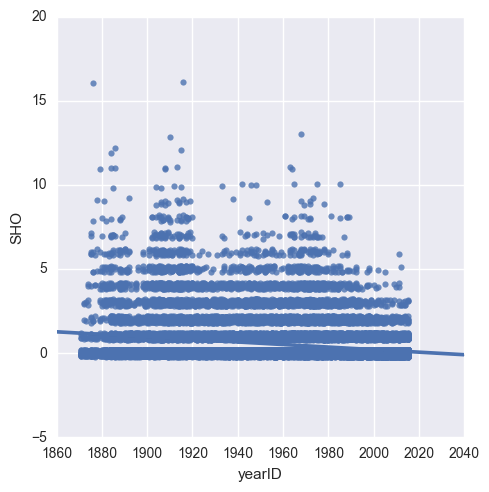

In [34]:
g = sns.lmplot(x='yearID',y='SHO',y_jitter=.2,data=pitch_agg_df)

#### All Star games
FInally, we look at the number of players chosen for all-star games, and whether that has been increasing over time. It does not seem to be, based on the visualization below.

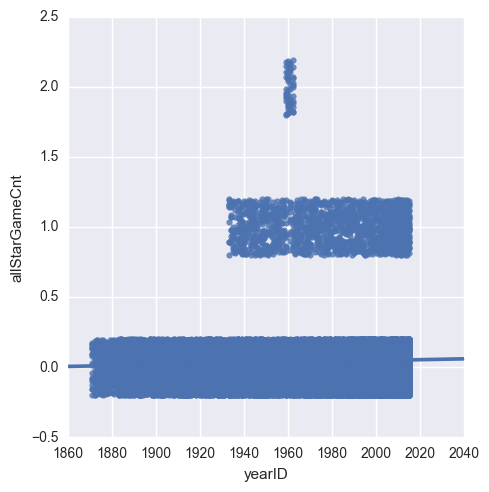

In [35]:
g = sns.lmplot(x='yearID',y='allStarGameCnt',y_jitter=.2,data=pitch_agg_df)

# Conclusions


   Based on the data analysis and visualizations, a number of conclusions can be drawn. The number of All-Star games that a Pitcher is chosen for in a given year seems to be weakly correlated with a number of pitching statistics, including the number of Strikeouts, Shutouts, and wins that the pitcher had in a season. However, the correlation between many of the variables have much higher correlations with each other, as well as with the number of wins in a season for the player. 
       
   Trends over time suggest that slightly fewer hits are happening than in the past (per pitcher)as well as fewer shutouts per season, but more homeruns were hit over time (also per pitcher). Other variables showed less of a correlation with yearID, suggesting there were no trends in those statistics over the years.